# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [1]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [7]:
# Import data
xr = pd.read_csv('exch_rates.csv')
xr
# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'], yearfirst=True)

# # Set the 'Frequency' column as the index
xr = xr.set_index('Frequency')

Plot all three exchange rates in one graph: 

<AxesSubplot:xlabel='Frequency'>

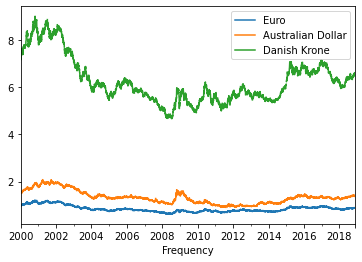

In [8]:
# Plot here
xr.plot()

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [9]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

array([<AxesSubplot:xlabel='Frequency'>, <AxesSubplot:xlabel='Frequency'>,
       <AxesSubplot:xlabel='Frequency'>], dtype=object)

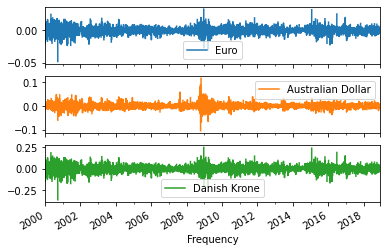

In [11]:
# 1-lag differenced series 
xr_diff = xr.diff(1)
xr_diff.plot(subplots = True)

In [ ]:
# Plot


Calculate the correlation of this differenced time series. 

In [12]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [14]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(1)

<AxesSubplot:xlabel='Frequency'>

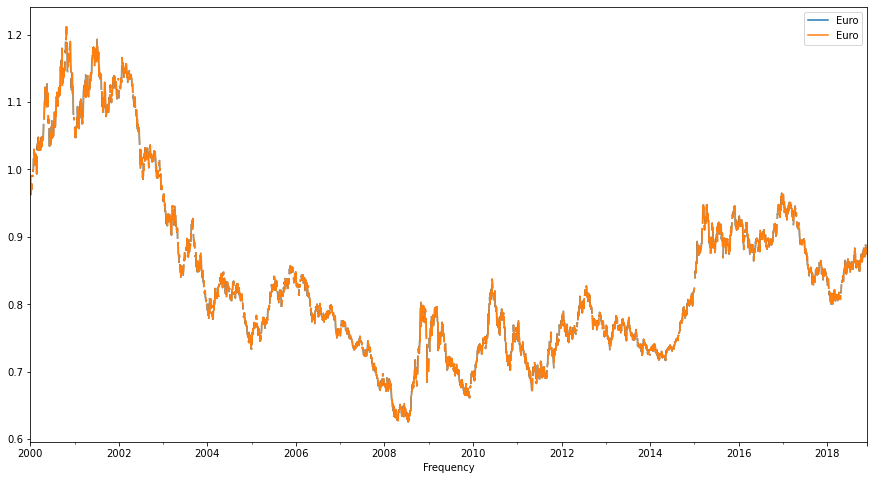

In [17]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur, eur_shift_1], axis = 1)

# Plot 
lag_1.plot(figsize= (15,8))

In [18]:
# Correlation
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this for a "lag-50 autocorrelation". 

<AxesSubplot:xlabel='Frequency'>

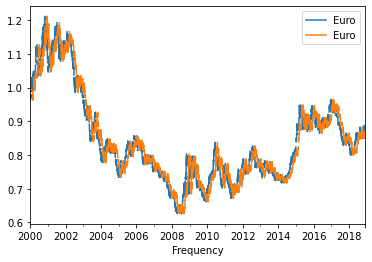

In [19]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis = 1)

# Plot
lag_50.plot()

In [20]:
# Correlation
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [29]:
xr.ffill()
xr.bfill()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,0.991080,1.520912,7.374034
2000-01-02,0.991080,1.520912,7.374034
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170
...,...,...,...
2018-11-22,0.876962,1.378672,6.543541
2018-11-23,0.880902,1.383721,6.573115
2018-11-24,0.880049,1.378509,6.566224


Knowing this, let's plot the ACF now.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

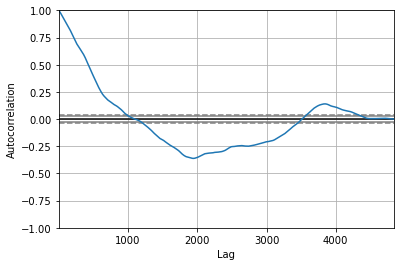

In [34]:
# Plot ACF
pd.plotting.autocorrelation_plot(eur.dropna())

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

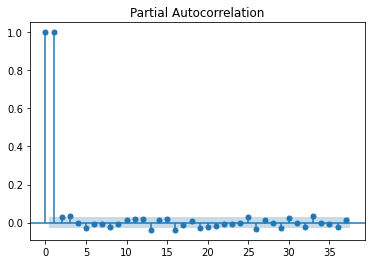

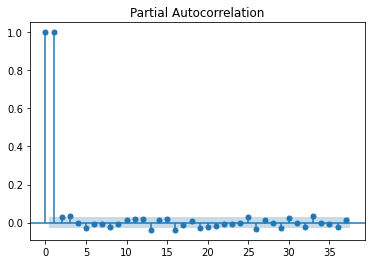

In [35]:
# Plot PACF
plot_pacf(eur.dropna())

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [37]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


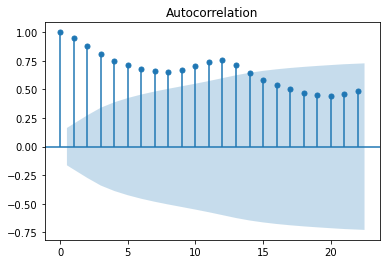

In [50]:
# Plot ACF (regular)
plot_acf(air);

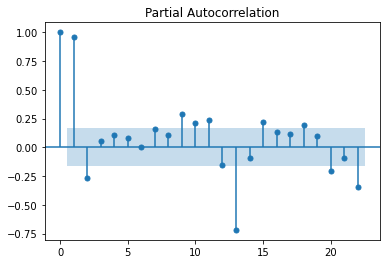

In [51]:
# Plot PACF (regular)
plot_pacf(air);

In [40]:
# Generate a differenced series
air_diff = air.diff()

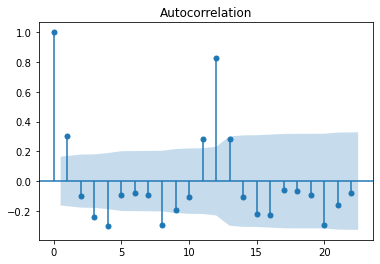

In [52]:
# Plot ACF (differenced)
plot_acf(air_diff.dropna());


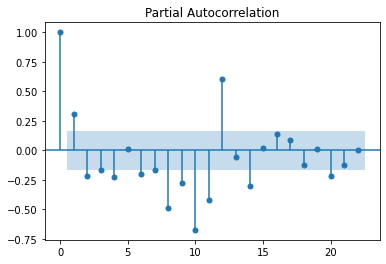

In [53]:
# Plot PACF (differenced)
plot_pacf(air_diff.dropna());

### Your conclusion here

## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [46]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()
nyse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   monthly_return  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


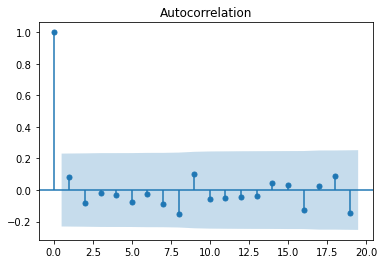

In [54]:
# Plot ACF
plot_acf(nyse);

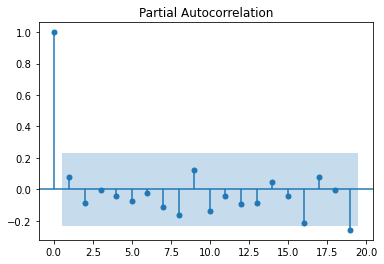

In [55]:
# Plot PACF
plot_pacf(nyse);

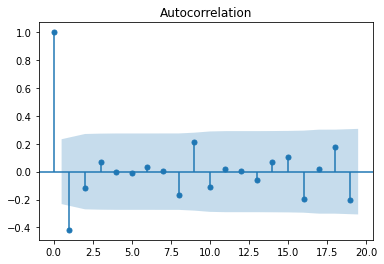

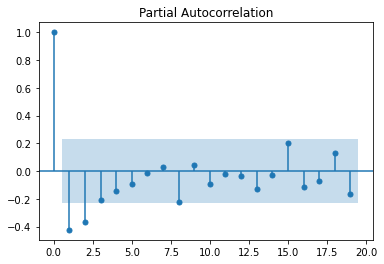

In [56]:
nyse_diff = nyse.diff()
plot_acf(nyse_diff.dropna());
plot_pacf(nyse_diff.dropna());

## Your conclusion here



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!